In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# Load the penguins dataset
penguins = sns.load_dataset('penguins')
# Drop rows with missing values
penguins.dropna(inplace=True)
# Features
#X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
X = penguins[['bill_length_mm', 'bill_depth_mm']]

# Target: 1 if Adelie, 0 otherwise
y = (penguins['species'] == 'Adelie').astype(int)

In [90]:
#scaler = StandardScaler()
#scaler= MinMaxScaler()
#X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X= X / X.max()

In [91]:
model = LogisticRegression(C=1, solver="saga", fit_intercept=False, max_iter=10000)
model.fit(X, y)

LogisticRegression(C=1, fit_intercept=False, max_iter=10000, solver='saga')

TypeError: float() argument must be a string or a real number, not 'tuple'

In [ ]:
# Print model coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}\n")

In [ ]:
def manual_prob(row):
    linear_sum = intercept + np.dot(coefficients, row)
    return 1 / (1 + np.exp(-linear_sum))

In [ ]:
y_prob_manual = X.apply(manual_prob, axis=1)

In [ ]:
# Create results DataFrame
results = X.copy()
results['Actual'] = y.values
results['Predicted'] = model.predict(X)
results['Probability_Adelie'] = model.predict_proba(X)[:,1]
results['Probability_Adelie_Manual'] = y_prob_manual

# Show first few rows
print(results.head(10))

In [ ]:
model.score(X, y)

C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


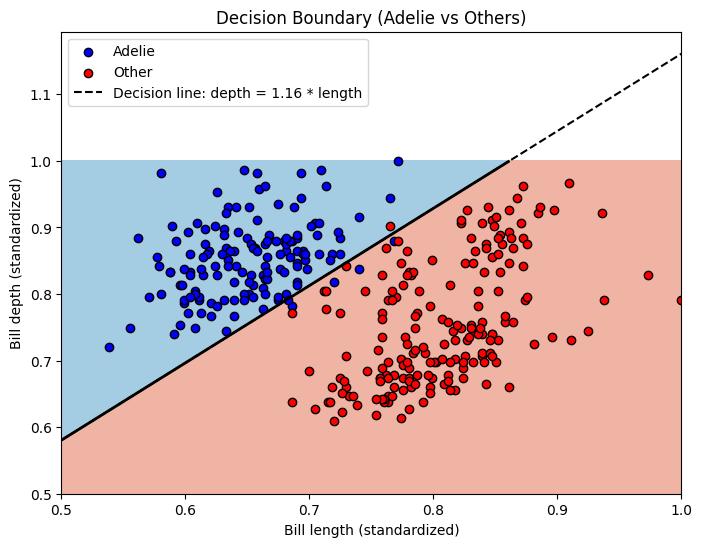

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x_min, x_max = 0.5, 1
y_min, y_max = 0.5, 1

# Coefficients from scikit-learn LogisticRegression
coefficients = model.coef_.flatten()  # shape (2,)
slope = (-coefficients[0] / coefficients[1]).item()  # scalar
intercept = 0  # no intercept

# Line for plotting
x_vals = np.array([float(x_min), float(x_max)])
y_vals = slope * x_vals + intercept

# Create meshgrid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=[0,0.5,1], cmap='RdBu', alpha=0.6)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

# Scatter plot
y_series = pd.Series(y, index=X.index)  # do not overwrite y
plt.scatter(X.loc[y_series==1, 'bill_length_mm'], X.loc[y_series==1, 'bill_depth_mm'],
            c='blue', edgecolor='k', label='Adelie')
plt.scatter(X.loc[y_series==0, 'bill_length_mm'], X.loc[y_series==0, 'bill_depth_mm'],
            c='red', edgecolor='k', label='Other')

# Decision line
plt.plot(x_vals, y_vals, 'k--', label=f"Decision line: depth = {slope:.2f} * length")

plt.xlabel('Bill length (standardized)')
plt.ylabel('Bill depth (standardized)')
plt.title('Decision Boundary (Adelie vs Others)')
plt.legend()
plt.show()
